# Check notebook is using the correct conda environment

In [1]:
!which python

/afs/bx.psu.edu/user/d/dzb5732/miniconda3/envs/starrseq/bin/python


# Import modules

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import itertools
from itertools import starmap
from argparse import Namespace
import matplotlib.pyplot as plt

Loading BokehJS ...

In [3]:
# internal modules
sys.path.append("./src/")

# Arguments

In [8]:
# TODO: INPUT CONTROL FLAGS as GLOBALS

##### GLOBALS #####
INLIBPRE = "/data5/deepro/starrseq/main_lib/raw_data/Input_SeqReady"
CCLIBPRE = "/data5/deepro/starrseq/main_lib/raw_data/CC"
KOLIBPRE = "/data5/deepro/starrseq/main_lib/raw_data/ATF2"

INLIBREP = "A1_R1_S1 B1_R2_S2 C1_R3_S3"
CCLIBREP = "R1_STARR_Seq_S4 R2_STARR_Seq_S5 R3_STARR_Seq_S6"
KOLIBREP = "R1_STARR_Seq_S10 R2_STARR_Seq_S11 R3_STARR_Seq_S12"

INLIBPAIR = "R1 R3"
CCLIBPAIR = "R1 R3"
KOLIBPAIR = "R1 R3"

INLIBUMI = "R2"
CCLIBUMI = "R2"
KOLIBUMI = "R2"

INLIBSUF = "001.fastq.gz"
CCLIBSUF = "001.fastq.gz"
KOLIBSUF = "001.fastq.gz"

REFGEN = "/data5/deepro/genomes/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta"
ROISORTED = "/afs/bx.psu.edu/user/d/dzb5732/work/girirajan_lab/starrseq/data/master.sorted.bed"
ROIMASTER = "/afs/bx.psu.edu/user/d/dzb5732/work/girirajan_lab/starrseq/data/enhancer_master_list_hek293.bed"

RUN=False
INPUT_FLAG=True
CONTROL_FLAG=True

args = Namespace(
    input_library_prefix = INLIBPRE,
    control_library_prefix = CCLIBPRE,
    ko_library_prefix = KOLIBPRE,
    input_library_reps = INLIBREP,
    control_library_reps = CCLIBREP,
    ko_library_reps = KOLIBREP,
    input_library_pair = INLIBPAIR,
    control_library_pair= CCLIBPAIR,
    ko_library_pair = KOLIBPAIR,
    input_library_umi = INLIBUMI,
    control_library_umi = CCLIBUMI,
    ko_library_umi = KOLIBUMI,
    input_library_suffix = INLIBSUF,
    control_library_suffix = CCLIBSUF,
    ko_library_suffix = KOLIBSUF,
    reference_genome = REFGEN,
    region_of_interest_master = ROIMASTER,
    region_of_interest_sorted = ROISORTED,
    region_of_interest_sorted_seq = ROISORTED.replace("sorted", "sorted.seq"),
    input_library_aligned_prefix = INLIBPRE.replace("raw_data", "aligned_reads"),
    control_library_aligned_prefix = CCLIBPRE.replace("raw_data", "aligned_reads"),
    ko_library_aligned_prefix = KOLIBPRE.replace("raw_data", "aligned_reads"),
    input_library_filtered_prefix = INLIBPRE.replace("raw_data", "filtered_libraries"),
    control_library_filtered_prefix = CCLIBPRE.replace("raw_data", "filtered_libraries"),
    ko_library_filtered_prefix = KOLIBPRE.replace("raw_data", "filtered_libraries"),
    input_library_filtered_bam = INLIBPRE.replace("raw_data", "filtered_libraries") + ".bam",
    control_library_filtered_bam = CCLIBPRE.replace("raw_data", "filtered_libraries") + ".bam",
    ko_library_filtered_bam = KOLIBPRE.replace("raw_data", "filtered_libraries") + ".bam",
    input_library_coverage_bed = INLIBPRE.replace("raw_data", "filtered_libraries") + ".coverage.bed",
    control_library_coverage_bed = CCLIBPRE.replace("raw_data", "filtered_libraries") + ".coverage.bed",
    ko_library_coverage_bed = KOLIBPRE.replace("raw_data", "filtered_libraries") + ".coverage.bed",
    input_library_depth_bed = INLIBPRE.replace("raw_data", "filtered_libraries") + ".depth.bed",
    control_library_depth_bed = CCLIBPRE.replace("raw_data", "filtered_libraries") + ".depth.bed",
    ko_library_depth_bed = KOLIBPRE.replace("raw_data", "filtered_libraries") + ".depth.bed",
    control_peaks_prefix = CCLIBPRE.replace("raw_data", "results/peaks"),
    ko_peaks_prefix = KOLIBPRE.replace("raw_data", "results/peaks"),
    control_peak_file = CCLIBPRE.replace("raw_data", "results/peaks") + ".peak.final.bed",
    ko_peak_file = KOLIBPRE.replace("raw_data", "results/peaks") + ".peak.final.bed",
    ko_activated_file = KOLIBPRE.replace("raw_data", "results/peaks") + ".peak.activated.bed",
    ko_repressed_file = KOLIBPRE.replace("raw_data", "results/peaks") + ".peak.repressed.bed",
    ko_avalidated_file = KOLIBPRE.replace("raw_data", "results/peaks") + ".peak.avalidated.bed",
    ko_rvalidated_file = KOLIBPRE.replace("raw_data", "results/peaks") + ".peak.rvalidated.bed",
    ko_name = "eGFP-ATF2",

    umi_flag = True if INLIBUMI else False,
    input_flag = INPUT_FLAG,
    control_flag = CONTROL_FLAG,

    # TODO: MEA onwards naming and directory convention
    # ko_rnaseq_de = "/data5/deepro/starrseq/nextseq_feb_2021/rna_seq_data/ATF2_vs_CC.tsv",
    # handcrafted_list_mea = ["ATF1", "ko", "ATF3", "ATF4", "ATF5", "ATF6", "ATF7",
    #                         "JUN", "JUNB", "JUND", 
    #                         "TP53", "TP73",
    #                         "NFIL3",
    #                         "CREB1", "CREB3", "CREB5",
    #                         "FOS", "FOSB", "FOSL1", "FOSL2", 
    #                         "STAT1", "STAT2", "STAT3", 
    #                         "BHLHE41", 
    #                         "HOXB4", 
    #                         "NEUROG2", 
    #                         "WT1", 
    #                         "E2F6"],
    # mea_ko_activated_results_dir = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/activated/",
    # mea_ko_repressed_results_dir = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/repressed/",
    # moi_activated = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/activated/knownResults/known13.motif",
    # mea_ko_activated_results_specific_motif_dir = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/activated/moiResults/",
    # moi_repressed = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/repressed/knownResults/known1.motif",
    # mea_ko_repressed_results_specific_motif_dir = "/data5/deepro/starrseq/nextseq_feb_2021/results/mea/ko/repressed/moiResults/",

)

# TODO: Discovery

## Motif Enrichment Analysis with HOMER 

## Find motif locations from mea results

In [ ]:
# # find the motif location in the activated file
# !findMotifsGenome.pl $atf2_activated_file $reference_genome $mea_atf2_activated_results_specific_motif_dir -find $moi_activated > $mea_atf2_activated_results_specific_motif_dir"known13.txt" 



	Position file = /data5/deepro/starrseq/nextseq_feb_2021/results/atf2.peak.activated.bed
	Genome = /data5/deepro/genomes/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta
	Output Directory = /data5/deepro/starrseq/nextseq_feb_2021/results/mea/atf2/activated/moiResults/
	Will find motif(s) in /data5/deepro/starrseq/nextseq_feb_2021/results/mea/atf2/activated/knownResults/known13.motif
	Using Custom Genome
	Peak/BED file conversion summary:
		BED/Header formatted lines: 20
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 20
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.
	Custom genome sequence file: /data5/deepro/genomes/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta

	Extracting sequences from file: /data5/deepro/genomes/GRCh3

In [ ]:
# # find the motif location in the repressed file
# !findMotifsGenome.pl $atf2_repressed_file $reference_genome $mea_atf2_repressed_results_specific_motif_dir -find $moi_repressed > $mea_atf2_repressed_results_specific_motif_dir"known1.txt" 


	Position file = /data5/deepro/starrseq/nextseq_feb_2021/results/atf2.peak.repressed.bed
	Genome = /data5/deepro/genomes/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta
	Output Directory = /data5/deepro/starrseq/nextseq_feb_2021/results/mea/atf2/repressed/moiResults/
	Will find motif(s) in /data5/deepro/starrseq/nextseq_feb_2021/results/mea/atf2/repressed/knownResults/known1.motif
	Using Custom Genome
	Peak/BED file conversion summary:
		BED/Header formatted lines: 22
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 22
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.
	Custom genome sequence file: /data5/deepro/genomes/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta

	Extracting sequences from file: /data5/deepro/genomes/GRCh38

# TODO: Verification of enriched motifs with RNASeq data

In [ ]:
# df_ko_de = pd.read_csv(args.ko_rnaseq_de, sep="\t")
# minidf = df_ko_de.loc[df_ko_de.gene_symbol.isin(args.handcrafted_list_mea)]

def neglog10(x):
    return -np.log10(x)

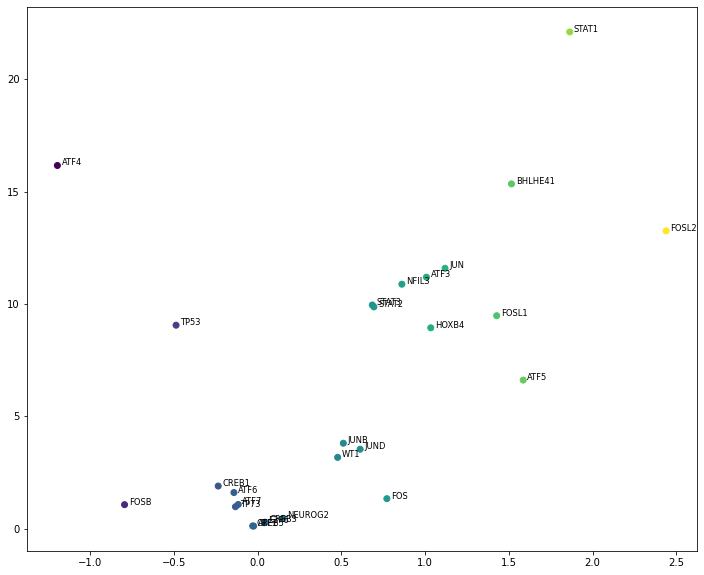

In [ ]:
# negP = minidf.PValue.apply(neglog10)

# plt.figure(figsize=(12,10))
# plt.scatter(minidf.logFC, negP, c=minidf.logFC)
# for i in range(len(minidf)):
#     plt.text(minidf.logFC.iloc[i]+0.025, negP.iloc[i], minidf.gene_symbol.iloc[i], fontsize="small")